In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train_loan.csv')

In [3]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
print("\nColumns in the dataset:")
print(df.columns)
print("\nData types of columns:")
print(df.dtypes)
print("\nFirst few rows of the dataset:")
print(df.head())

Shape of the dataset: (614, 13)

Columns in the dataset:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Data types of columns:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

First few rows of the dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Gr

In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Example: Impute missing values for numerical columns with mean
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

Missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


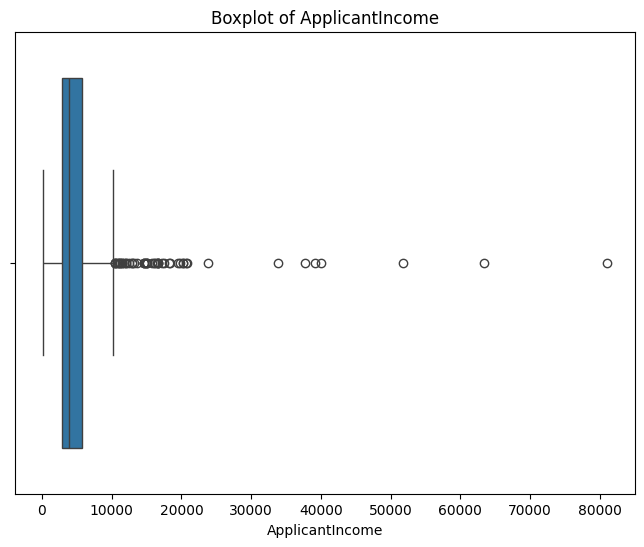

In [6]:
#Step 2b: Outlier Detection
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Detect outliers in a numerical column using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ApplicantIncome'])
plt.title('Boxplot of ApplicantIncome')
plt.show()

In [7]:
# Example: Remove outliers using IQR method
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

In [8]:
# Example: Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)
print("Shape of encoded dataset:", df_encoded.shape)
print("\nColumns after encoding:")
print(df_encoded.columns)

Shape of encoded dataset: (564, 14)

Columns after encoding:
Index(['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Gender_Male', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')


In [9]:
from sklearn.preprocessing import StandardScaler

# Example: Standardize numerical columns
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [10]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.895597,-0.568535,0.209517,0.279070,0.453286,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.238031,-0.061915,-0.107911,0.279070,0.453286,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,-0.584187,-0.568535,-1.176802,0.279070,0.453286,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,-0.800778,0.223647,-0.245833,0.279070,0.453286,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.974028,-0.568535,0.116211,0.279070,0.453286,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,-0.636127,-0.568535,-1.090601,0.279070,0.453286,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,-0.009725,-0.568535,-1.625046,-2.495234,0.453286,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,2.050234,-0.487905,2.047109,0.279070,0.453286,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,1.796245,-0.568535,0.909258,0.279070,0.453286,Urban,Y
